# Домашняя работа №2

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 6,3

import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

Populating the interactive namespace from numpy and matplotlib


## Генеральная совокупность и выборка

- **Чем отличается генеральная совокупность от выборки?**

Генеральная совокупность - вся изучаемая совокупность обьектов, когда как выборка - представительная часть генеральной совокупности.

- **Если размер выборки больше 200, то такая выборка является репрезентативной?**

Репрезентативность выборки определяется соответствием относительных характериктеристик этой выборки с генеральной совокупностью. Чем больше эта выборка, тем лучше она отражает реальные характеристи генеральной совокупности. Но репрезентативность определяется не столько размером, сколько представительность. Например, пусть требуется определить средний рост учеников школы. Всего в школе 800 учеников. Если мы возьмем 200 человек из старших классов, то выборка окажется хоть и достаточно большой, но ее характеристики будут далеки от характеристик ген. совокупности. Для лучшей репрезентативности требуется взять несколько человек разных полов из каждого класса.

- **Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.**

Если длина волос футболистов сборной Франции на ЧМ-2018 это некая выборка генеральной совокупности, то можно привести, например, такие ген. совокупности:

1) Длина волос футболистов всех сборных мира.

2) Длина волос мужчин французов.

3) Длина волос футболистов сборной Франции на всех Чемпионатах мира по футболу.

- **Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.**

Например, можно разбить ген. совокупность соответственно на 10 частей по годам и выбирать несколько человек родившихся в соответствующие годы. Можно, в зависимости от нашего интереса, так же, например, разбить Волгоград на районы и выбирать по несколько человек в каждом районе Волгограда.

## Параметры центра и разброса

- **Постройте распределение, у которого отсутствует мода.**


Text(0.5,0,'$x$, значение случайной величины')

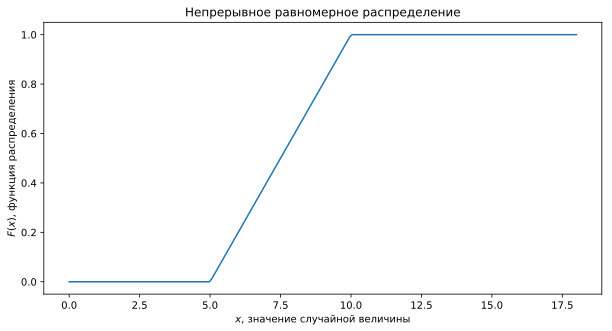

In [2]:
uniform_rv = stats.uniform(5, 5)
uniform_rv.rvs(size=50)
x = np.linspace(0,18, 200)
cdf = uniform_rv.cdf(x)
pdf = uniform_rv.pdf(x)
#Распределение Пуассона - дискретное
plt.figure(figsize=(10,5))
plt.plot(x, cdf)
plt.title('Непрерывное равномерное распределение')
plt.ylabel('$F(x)$, функция распределения')
plt.xlabel('$x$, значение случайной величины')

Text(0.5,0,'$x$, значение случайной величины')

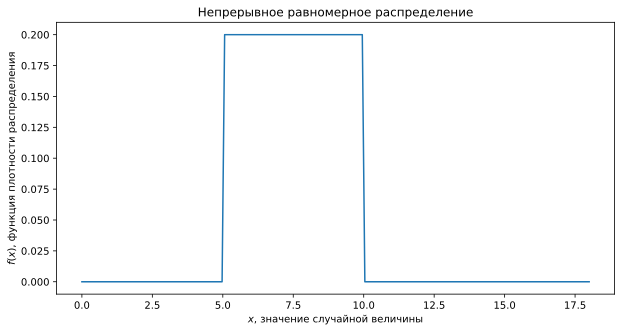

In [3]:
plt.figure(figsize=(10,5))
plt.plot(x, pdf)
plt.title('Непрерывное равномерное распределение')
plt.ylabel('$f(x)$, функция плотности распределения')
plt.xlabel('$x$, значение случайной величины')

Как видно, из функции плотности равномерного распределения, модой является любое число из отрезка (5, 10). То есть как таковой моды нет для равномерного распределения.

- **Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения.**

In [4]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = np.median(sample)
mean = sample.mean()

#your code here
overshoot = [15, 20, 25]
sample_with_overshoot = np.append(sample, overshoot)
new_med = np.median(sample_with_overshoot)
new_mean = sample_with_overshoot.mean()

In [5]:
print("Медиана до выброса {:.3f} и после {:.3f}, матожидание до {:.3f} и после {:.3f}".format(med, new_med, mean, new_mean))
print('Видно, что матожидание сильнее подвержено влиянию выбросов, чем медиана.')

Медиана до выброса 3.530 и после 3.844, матожидание до 3.941 и после 4.833
Видно, что матожидание сильнее подвержено влиянию выбросов, чем медиана.


- **Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. Проверите на выборке из распределения Пуассона**

In [6]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
sample1 = np.array([i+C for i in sample])
sample2 = np.array([i*C for i in sample])

mean = print('Матожидание без С', sample.mean())
mean_with_c = print('Матожидание c добавленным С', sample1.mean())
mean_mult_c = print('Матожидание с умножением на С', sample2.mean())


Матожидание без С 2.02
Матожидание c добавленным С 2.52
Матожидание с умножением на С 1.01


Видно, что справедлива формула: $M(Cx + B) = C*M(x) + B$, где С и B = const.

- **Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения**

In [7]:
exp_rv = stats.expon(5)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = [15, 20, 30]
sample_with_overshoot = np.append(sample, overshoot)
new_var = sample_with_overshoot.var()
print('Дисперсия до выброса {:.3f} и после {:.3f}'.format(var, new_var))
print('Как видно, дисперсия значительно изменилась')

Дисперсия до выброса 1.079 и после 16.253
Как видно, дисперсия значительно изменилась


- **Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$**

In [8]:
import math
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
inter = np.percentile(sample, 75) - np.percentile(sample, 25)
print('Удвоенное стандартное отклонение: {:.3f}, интерквантильный размах {:.3f}'.format(2*math.sqrt(sample.var()), inter))

Удвоенное стандартное отклонение: 2.015, интерквантильный размах 1.384


Как видно,  $(\bar{X}-s, \bar{X}+s)$ больше, чем  ($X_{0.75} - X_{0.25}$) для нашего случая

## Основные статистики и ЦПТ

- **Что такое статистика? Посчитайте любую для бета-распределения (1,3)**

In [9]:
beta_rv = stats.beta(1,3)
#Для начала получим выборку бета-распределения, например, размером 100.
sample = beta_rv.rvs(100)
#Статистика -- любая функция от выборки, например, выборочное среднее, выборочная дисперсия.
print('Выборочное среднее: {:.3f}, выборочная дисперсия: {:.3f}'.format(sample.mean(), sample.var()))

Выборочное среднее: 0.241, выборочная дисперсия: 0.038


- **Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)**

In [10]:
gamma_rv = stats.gamma(2,2)
#Для начала получим выборку бета-распределения, например, размером 200.
sample = gamma_rv.rvs(200)
gamma_rv.median
mean = sample.mean() #оценка матожидания - выборочное среднее
var = sample.var() #оценка дисперсии - выборочная дисперсия
med = np.median(sample) #оценка медианы - выборочная медиана
print('Выборочное среднее: {:.3f}, выборочная дисперсия: {:.3f}, выборочная медиана {:.3f}'.format(mean, var, med))

Выборочное среднее: 4.085, выборочная дисперсия: 2.472, выборочная медиана 3.661


- **Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)**

Text(0.5,0,'$x$')

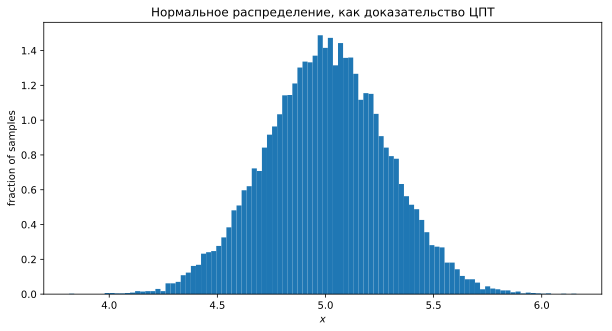

In [98]:
#Нормальное распределение
results = []
n = 50
norm_rv = stats.norm(5,2)
for i in range(20000):
    x = norm_rv.rvs(n)
    results.append(x.mean())

plt.figure(figsize=(10,5))
plt.hist(results, normed=True, bins=100)
plt.title('Нормальное распределение, как доказательство ЦПТ')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Из теории мы знаем, что $$\bar{X_n} \rightarrow^d \mathcal{N}(\mathbb{E}X_n,\frac{\mathbb{D}X_n}{n^{0.5}})$$

То есть матожидание должно быть равно 5, а среднеквадратичное отклонение $\frac{2}{50^{0.5}} = 0.282$

Проверим это.

In [99]:
print('Cреднеквадратичное отклонение распределения X среднего по ЦПТ равно: {:.3f}, матожидание: {:.3f}'
      .format((np.array(results).var())**0.5, np.array(results).mean()))

Cреднеквадратичное отклонение распределения X среднего по ЦПТ равно: 0.282, матожидание: 5.002


Таким образом по ЦПТ $\bar{X}$ действительно имеет нормальное распределение с параметрами 5 и ~0.28: $\mathcal{N}(5, 0.28)$

- **Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)**

Text(0.5,0,'$x$')

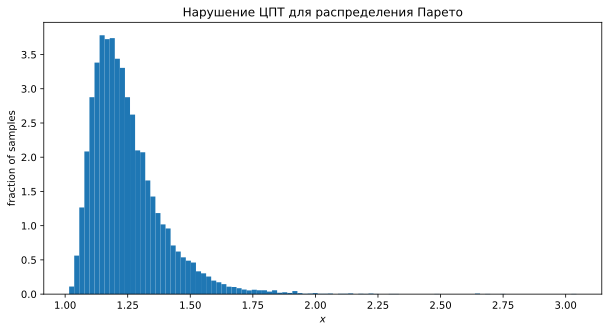

In [206]:
results = []
n = 5
pareto_rv = stats.pareto(5)
for i in range(20000):
    x = pareto_rv.rvs(n)
    results.append(x.mean())

plt.figure(figsize=(10,5))
plt.hist(results, normed=True, bins=100)
plt.title('Нарушение ЦПТ для распределения Парето')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

In [208]:
mean = np.array(results).mean()
sigma = (np.array(results).var())**0.5

In [209]:
norm_rv = stats.norm(mean, sigma)

Text(0.5,0,'$x$')

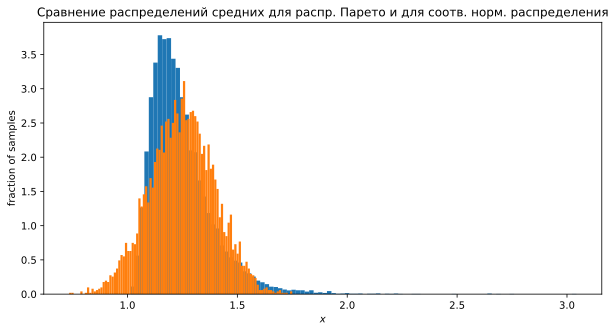

In [211]:
plt.figure(figsize=(10,5))
plt.hist(results, normed=True, bins=100)
plt.hist(norm_rv.rvs(5000), normed=True, bins=100)
plt.title('Сравнение распределений средних для распр. Парето и для соотв. норм. распределения')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

- **Сделайте z-преобразование для данного распределения**

$$z = \frac{X_i - \bar{X}}{\sigma}$$

In [13]:
import math
expon_rv = stats.expon(3)
sample = expon_rv.rvs(5000)
mean = sample.mean()
sigma = math.sqrt(sample.var())

new_rv = np.array([(element - mean)/sigma for element in sample])
var = new_rv.var()
mean = new_rv.mean()

#для проверки результата можно использовать функцию allclose
print('Матожидание данного распределения после z-преобразования равно 0? {}. Дисперсия = 1? {}.'
      .format(np.allclose(mean, 0), np.allclose(var, 1)))

Матожидание данного распределения после z-преобразования равно 0? True. Дисперсия = 1? True.


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- **Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.**

In [14]:
chi2_rv = stats.chi2(10)
print('Доверительный интервал 90%: ', round(chi2_rv.ppf(0.90), 3))

Доверительный интервал 90%:  15.987


- **Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?**

In [70]:
t_rv = stats.t(15)
print('Односторонний доверительный интервал 90%: {:.3f}, 95%: {:.3f}'
      .format(t_rv.ppf(0.90), t_rv.ppf(0.95)))
print('Двухсторонний доверительный интервал 90%: {:.3f}, 95%: {:.3f}'
      .format(2*t_rv.interval(0.90)[1], 2*t_rv.interval(0.95)[1]))
print("Как видно, 95% шире и в том и в другом случае.")

Односторонний доверительный интервал 90%: 1.341, 95%: 1.753
Двухсторонний доверительный интервал 90%: 3.506, 95%: 4.263
Как видно, 95% шире и в том и в другом случае.


In [71]:
t_rv.interval(0.90)

(-1.7530503556925554, 1.7530503556925547)

- **Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$**

In [16]:
norm_rv = stats.norm(0, 2)
sample1 = norm_rv.rvs(500)
sample2 = norm_rv.rvs(1000)
print('Односторонний доверительный интервал 90% для мЕньшей выборки: {:.3f}, для бОльшей: {:.3f}'
      .format(np.percentile(sample1, 90), np.percentile(sample2, 90)))
print('Видно, что для бОльшей выборки ДИ более узкий.')

Односторонний доверительный интервал 90% для мЕньшей выборки: 2.658, для бОльшей: 2.620
Видно, что для бОльшей выборки ДИ более узкий.


- **Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?**

Наша нулевая гипотеза $H_0$ состоит в том, что среднее равно 100, но оказалось, что среднее равно 114. Таким образом, мы не отклонили ложную гипотезу, значит это **ошибка второго рода**: неверная гипотеза $H_0$ была принята/не отвергнута.

**Какие рассуждения относительно p-value верные?**

- **Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.**
- **Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.**
- **Чем меньше p уровень значимости, тем сильнее получаемые различия.**


 1) Неверно
 
 2) Неверно. Это значит, что мы можем **не отвергать** гипотезу.
 
 3) В общем случае, это также неверно.

**Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?**

- При $p = 0.01$ доверительный интервал будет 99%, таким образом, с вероятностью 99% найдется истинное значение, таким образом, если $H_0$ отвергать рисковано, то лучше использовать 99% доверительный интервал и $p = 0.01$.
- Нет, не является, так как покрывает почти всю ось, а значит почти точно содержит истинное значение.

## Стьюдент и корреляция

- **Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?**

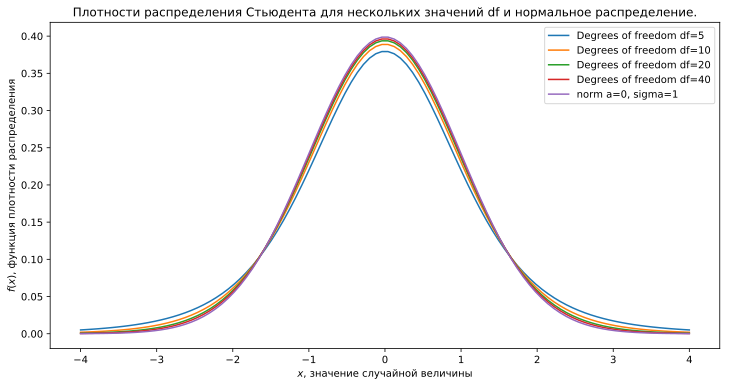

In [17]:
t_rv_1 = stats.t(5)
t_rv_2 = stats.t(10)
t_rv_3 = stats.t(20)
t_rv_4 = stats.t(40)
norm_rv = stats.norm(0, 1)

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(12,6))

plt.title('Плотности распределения Стьюдента для нескольких значений df и нормальное распределение.')
plt.xlabel('$x$, значение случайной величины')
plt.ylabel('$f(x)$, функция плотности распределения')

pdf_1 = t_rv_1.pdf(x)
plt.plot(x, pdf_1)

pdf_2 = t_rv_2.pdf(x)
plt.plot(x, pdf_2)

pdf_3 = t_rv_3.pdf(x)
plt.plot(x, pdf_3)

pdf_4 = t_rv_4.pdf(x)
plt.plot(x, pdf_4)

pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)

plt.legend(['Degrees of freedom df=5', 'Degrees of freedom df=10', 'Degrees of freedom df=20',
            'Degrees of freedom df=40', 'norm a=0, sigma=1'])

Как видно, распределение Стьедента имеет более низкий пик и более высокие "хвосты".
Но при стремлении степеней свободы к бесконечности t-распределение стремится к нормальному.

- **Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.**

Чтобы получить коэф. корреляции равный -1 можно, например, взять любую выборку любого распределения и получить такую же выборку, но с обратным знаком. Тогда их коэф. корреляции будет в точности -1.

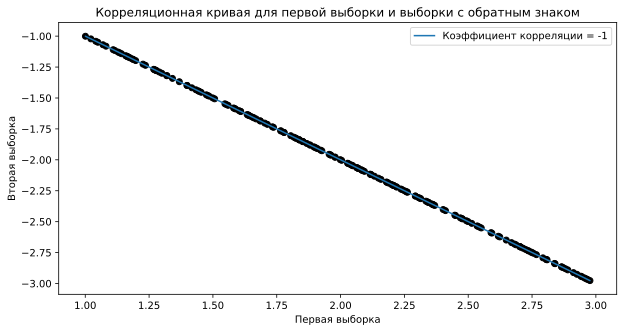

In [18]:
sample1 = stats.uniform(1, 2).rvs(200)
sample2 = [-1*i for i in sample1]
r = np.corrcoef(sample1, sample2)[0][1]

plt.figure(figsize=(10,5))
plt.title('Корреляционная кривая для первой выборки и выборки с обратным знаком')
plt.xlabel('Первая выборка')
plt.ylabel('Вторая выборка')
plt.scatter(sample1, sample2, color='black')
plt.plot(sample1, sample2, )
plt.legend(['Коэффициент корреляции = -1'])

Text(0.5,0.98,'Корреляционная кривая для первой выборки и выборки с обратным знаком')

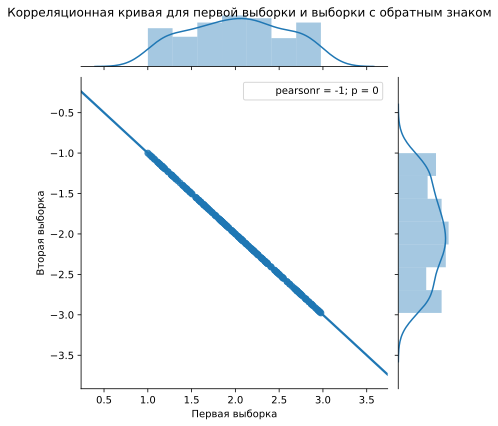

In [19]:
d = {'Первая выборка': sample1, 'Вторая выборка': sample2}
df = pd.DataFrame(data=d)
w = sns.jointplot(x='Первая выборка', y='Вторая выборка', data=df, kind='reg')
w.fig.suptitle('Корреляционная кривая для первой выборки и выборки с обратным знаком')

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

Коэффициент корреляции равен 0 тогда, когда две выборки независимы, то есть можно, например, рассмотреть два различных распределения или две выборки случайный величин. Их коэф. корреляции будет близок к 0.

In [20]:
sample1 = stats.uniform(1, 2).rvs(200)
sample2 = stats.gamma(1, 2).rvs(200)

In [21]:
d = {'sample1': sample1, 'sample2': sample2}
df = pd.DataFrame(data=d)

Text(0.5,0.98,'Корреляционная кривая для разных распределений')

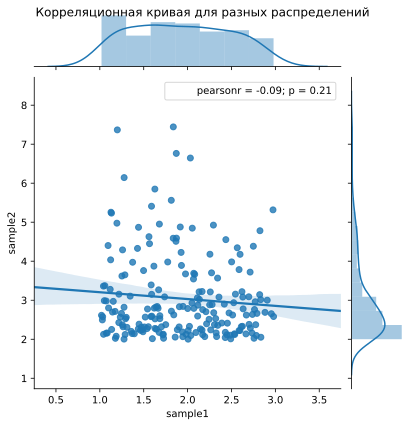

In [22]:
w = sns.jointplot(x='sample1', y='sample2', data=df, kind='reg')
w.fig.suptitle('Корреляционная кривая для разных распределений')

In [23]:
sample1=[]
sample2=[]
for i in range(500):
    sample1.append(random.uniform(-100, -110))
for i in range(500):
    sample2.append(random.uniform(15, 100))

In [675]:
d = {'Случайная величина x': sample1, 'Случайная величина y': sample2}
df = pd.DataFrame(data=d)

Text(0.5,0.98,'Корреляционная кривая для разных распределений')

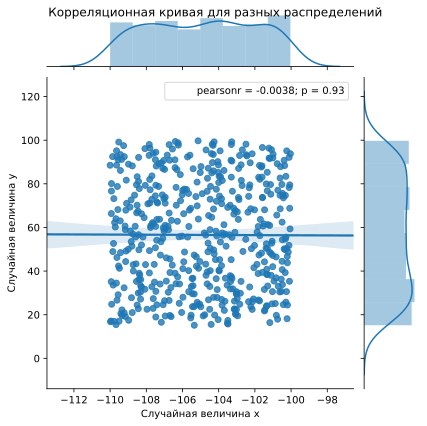

In [676]:
w = sns.jointplot(x='Случайная величина x', y='Случайная величина y', data=df, kind='reg')
w.fig.suptitle('Корреляционная кривая для разных распределений')

Также корреляция равна 0 в точности у таких симметричных функций, как, например, парабола.

Text(0.5,0.98,'Корреляционная кривая для параболы')

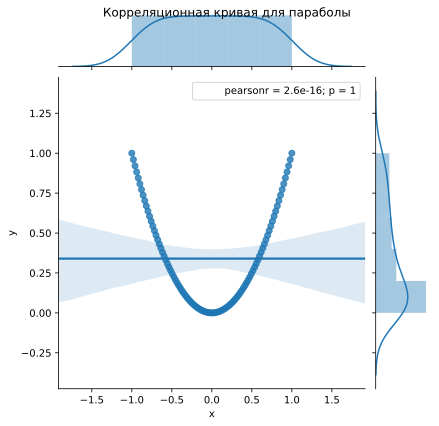

In [714]:
x = np.linspace(-1, 1, 100)
y = x**2
d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)
w = sns.jointplot(x='x', y='y', data=df, kind='reg')
w.fig.suptitle('Корреляционная кривая для параболы')

- **Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.**

In [43]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(20)
sample_2 = norm_rv.rvs(20)
sample = np.concatenate((sample_1, sample_2))

#Ранжирование
rank = stats.rankdata(sample)
rank_1 = sum(rank[:20])
rank_2 = sum(rank[20:40])

print('Сумма рангов для выборки №1: {}, и №2: {}'.format(rank_1, rank_2))

#Тогда U значение будет:
U = 20*20 + 20*(20+1)/2 - max([rank_1, rank_2]) #размеры наших выборок одинаковы и равны 20
print('U-значение: ', U)

Сумма рангов для выборки №1: 421.0, и №2: 399.0
U-значение:  189.0
